In [1]:
import scipy as sc
from scipy import signal
import os   #used for directory work
import matplotlib.pyplot as plt #used for creating plots
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches #used for plot legends
%matplotlib inline

In [2]:
burn_d = {'01': [21000 ,22289], '02': [14000, 14972], '03': [20000, 20296], '04': [30000, 34979], '05': [15000, 15974], \
          '06': [6000, 6544], '07': [25000, 27822], '08': [18000, 19810], '09': [20000, 25047], '11': [30000,30681],  \
          '12': [60000, 62937], '13': [50000, 55131], '18': [185000, 192322], '19': [45000, 48831], '20': [24000, 25860],\
          '21': [25000, 27822], '22': [27000, 29484], '23': [45000, 48846], '24': [20000, 23015], '25': [25000, 26797], \
          '26': [25000, 26909], '27': [35000, 36916], '28': [27000, 28673], '29': [25000, 28166], '30': [12000, 13954], \
          '31': [30000, 31046], '32': [25000, 26294], '33': [20000, 23293], '34': [40000,43702]}

In [3]:
def text_finder(path):
    txt_files=[]
    all_files = os.listdir(path) #tells what directory the files are in
    for i in all_files: #reading only the .txt files 
        if i[-4:] == ".txt":
            txt_files.append(i)
    txt_files.sort() #alphabetizes them
    
    return txt_files

def file_to_df(path):
    df= pd.read_csv(path,na_values = ['NAN', "00nan", "NaN", "000nan"], sep=" ")
    return df

                
def fire_start(df,n, n_sig = 5):    
    ### Finding the start of fire
    x_fire, fire_5sig = 9e10, np.nanmean(df["T"][:n])+n_sig*np.std(df["T"][:n]) 
    start = n-9000
    if n-9000< 0:
        start = 0
    #print(5*np.std(df["T"][start:n]))
    for i in range(n, len(df["T"])):
        if df["T"][i] > fire_5sig:
            x_fire = i
            break
    
    return x_fire

def fire_start_value(df,n,value = 10):    
    ### Finding the start of fire
    x_fire, fire_val = 9e10, np.nanmean(df["T"][:n])+value 
    start = n-9000
    if n-9000< 0:
        start = 0
    for i in range(n, len(df["T"])):
        if df["T"][i] > fire_val:
            x_fire = i
            break
    
    return x_fire

In [4]:
path = "/Users/joeyp/Desktop/10X10_Truss_SERDP_Burns/JS_Cleaned_Data/Full-Timestamp/Burn-" #w10
path_end = "/sonics/"
sc_name_lst= ["A1","A2", "A3", "A4", "B1", "B2", "B3", "B4", \
                 "C1", "C2", "C3", "C4", "D1", "D2", "D3", "D4"]
df_index_lst = []

for brn in list(burn_d.keys()):
    for snc in sc_name_lst:
        df_index_lst.append(str("B"+brn+snc))

df_fire_starts = pd.DataFrame()              
df_fire_starts["BRNSNC"] = df_index_lst
val_lst = [0,2, 4, 6, 8, 10, 12.5, 15, 17.5, 20]
sig_val_lst = [0,3,5,8,10,15,20,25,30,35]
for sig in sig_val_lst:
    f_s_lst, f_t_lst = [],[]
    for brn in range(len(list(burn_d.keys()))):
        burn = list(burn_d.keys())[brn]
        p = path+burn+ path_end
        files = text_finder(p)
        df_list = []
        for i in range(16):
            df_list.append(file_to_df(p+files[i]))


        for df in range(len(df_list)):
            f_s = fire_start(df_list[df], burn_d[burn][0],sig)
            if f_s ==  9e10:
                f_s_lst.append(np.nan)
                f_t_lst.append(np.nan)
                continue
            f_t = df_list[df]["TIMESTAMP"][f_s]
            f_s_lst.append(int(f_s))
            f_t_lst.append(f_t)

    df_fire_starts["brn_ts_"+str(sig)+"_sig"] = f_t_lst
    df_fire_starts["brn_id_"+str(sig)+"_sig"] = f_s_lst


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice


In [5]:
val_lst = [0,2, 4, 6, 8, 10, 12.5, 15, 17.5, 20]
for val in val_lst:
    f_s_lst, f_t_lst = [],[]
    for brn in range(len(list(burn_d.keys()))):
        burn = list(burn_d.keys())[brn]
        p = path+burn+ path_end
        files = text_finder(p)
        df_list = []
        for i in range(16):
            df_list.append(file_to_df(p+files[i]))


        for df in range(len(df_list)):
            f_s = fire_start_value(df_list[df], burn_d[burn][0],val)
            if f_s ==  9e10:
                f_s_lst.append(np.nan)
                f_t_lst.append(np.nan)
                continue
            f_t = df_list[df]["TIMESTAMP"][f_s]
            f_s_lst.append(int(f_s))
            f_t_lst.append(f_t)

    df_fire_starts["brn_ts_+"+str(val)+"C"] = f_t_lst
    df_fire_starts["brn_id_+"+str(val)+"C"] = f_s_lst

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: Mean of empty slice


In [8]:
fill_nan = input("Value for NaN:")
df_fire_starts.fillna(value=fill_nan, inplace=True)

Value for NaN:NaN


In [9]:
df_fire_starts.to_csv("fire_starts_dataframe.txt", sep=' ',index=False)

In [139]:
val_lst = [0,2, 4, 6, 8, 10, 12.5, 15, 17.5, 20]
sig_val_lst = [0,3,5,8,10,15,20,25,30,35]
for i in range(len(sig_val_lst)):
    sig_val_lst[i] = str(sig_val_lst[i])+" ${\sigma}$"
    val_lst[i]= str(val_lst[i])+" $^{\circ}C$"
print(sig_val_lst, val_lst)

['0 ${\\sigma}$', '3 ${\\sigma}$', '5 ${\\sigma}$', '8 ${\\sigma}$', '10 ${\\sigma}$', '15 ${\\sigma}$', '20 ${\\sigma}$', '25 ${\\sigma}$', '30 ${\\sigma}$', '35 ${\\sigma}$'] ['0 $^{\\circ}C$', '2 $^{\\circ}C$', '4 $^{\\circ}C$', '6 $^{\\circ}C$', '8 $^{\\circ}C$', '10 $^{\\circ}C$', '12.5 $^{\\circ}C$', '15 $^{\\circ}C$', '17.5 $^{\\circ}C$', '20 $^{\\circ}C$']


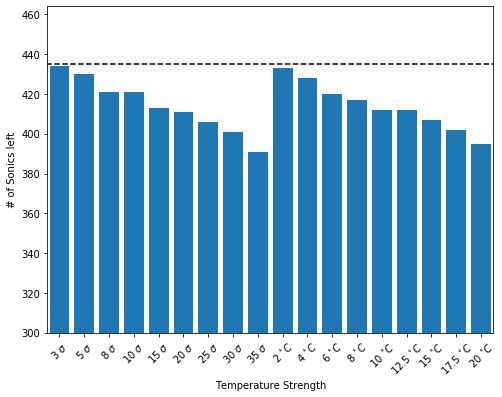

In [154]:
cols =list(df_fire_starts.columns)
y_vals, x_vals, c = [], [], 0
for i in range(3, len(cols),2):
    if i == 21:
        continue
    y_vals.append(((464)-(list(df_fire_starts[cols[i]]).count(np.nan))))#/(464-29))
    x_vals.append(c)
    c+=1

plt.figure(figsize = (8,6))    
#plt.grid(color='gray', linestyle='solid')
plt.bar(x_vals, y_vals)
plt.ylabel("# of Sonics left")
plt.xlabel("Temperature Strength")
plt.ylim(300,464)
plt.xlim(-.5,len(cols)/2-3)
plt.xticks(x_vals,list( sig_val_lst[1:]+val_lst[1:]),rotation = 45)
plt.hlines(435,-5,200, linestyle = "--")
#plt.grid("major")
#plt.xticklabels(sig_val_lst+val_lst)
plt.show()